# 霍夫变换

霍夫变换是一种在图像中寻找直线、圆形以及其他简单形状的方法。

霍夫直线变换用来在图像内寻找直线，霍夫圆变换用来在图像内寻找圆。在OpenCV中，前者可以用函数cv2.HoughLines()和函数cv2.HoughLinesP()实现，后者可以用函数cv2.HoughCircles()实现。

霍夫变换的原理《OpenCV轻松入门：面向Python》第十六章已经解释的很清楚了。需要的时候查看此书即可。

Text(0.5, 1.0, 'line')

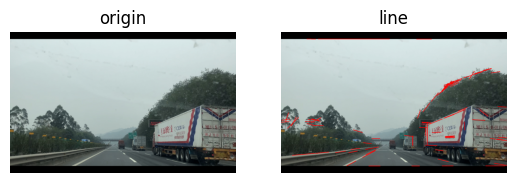

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images/highway.jpg', -1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 边缘检测
edges = cv2.Canny(gray,50,150, apertureSize =3)
orgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
oShow=orgb.copy()
# 霍夫变换
lines = cv2.HoughLinesP(edges,1, np.pi/180,1, minLineLength=100, maxLineGap=10)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(orgb, (x1, y1), (x2, y2), (255,0,0),5)
plt.subplot(121)
plt.imshow(oShow)
plt.axis('off')
plt.title('origin')
plt.subplot(122)
plt.imshow(orgb)
plt.axis('off')
plt.title('line')

# 霍夫圆环变换

霍夫变换除了用来检测直线外，也能用来检测其他几何对象。实际上，只要是能够用一个参数方程表示的对象，都适合用霍夫变换来检测。

(-0.5, 1999.5, 1999.5, -0.5)

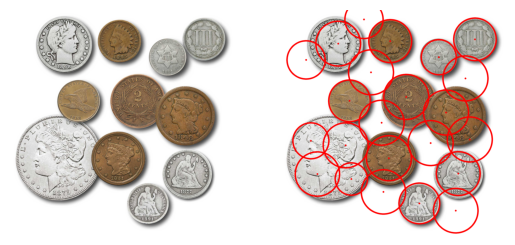

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images/coins.jpg',0)
imgo=cv2.imread('images/coins.jpg', -1)
o=cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)
oshow=o.copy()
img = cv2.medianBlur(img,5)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,1,300,
param1=50, param2=30, minRadius=100, maxRadius=200)
circles = np.uint16(np.around(circles))
for i in circles[0, :]:
  cv2.circle(o, (i[0], i[1]), i[2], (255,0,0),12)
  cv2.circle(o, (i[0], i[1]),2, (255,0,0),12)
plt.subplot(121)
plt.imshow(oshow)
plt.axis('off')
plt.subplot(122)
plt.imshow(o)
plt.axis('off')